# Sequential Data Pattern Prediction

Given a plot of a series of sequential data points, people can often very quickly identify trends and patterns in the data largely independent of the scale and number of data points. In this notebook I aim to explore if I can create models that can function similarly.

In [1]:
%matplotlib inline

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from functools import reduce
from scipy import signal

## Generating some sample data

I figure that randomly combining some basic functions should be able to create some patterns that humans can easily recognize. I can then sample from these functions to generate some sample data.

In [16]:
x = np.arange(0, 50, 0.5)

In [38]:
def get_random_fn(scale=1):
    a,b,c = tuple((np.random.rand(3) - 0.5) * 4 * scale)
    fns = [
        lambda x: x+10*a,
        lambda x: a*x,
        lambda x: a/x,
        lambda x: 10*a*np.sin(0.5*b*x+c),
#         lambda x: a*np.ceil(np.sin(0.5*b*x+c)),
        lambda x: a*signal.square(b*x+c),
        lambda x: np.maximum(x,a),
        lambda x: np.minimum(x,a),
        lambda x: 0.001*a*(x+b)**c,
        lambda x: 10*a*np.log(b*x+c)
    ]
    return fns[np.random.randint(len(fns))]

/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


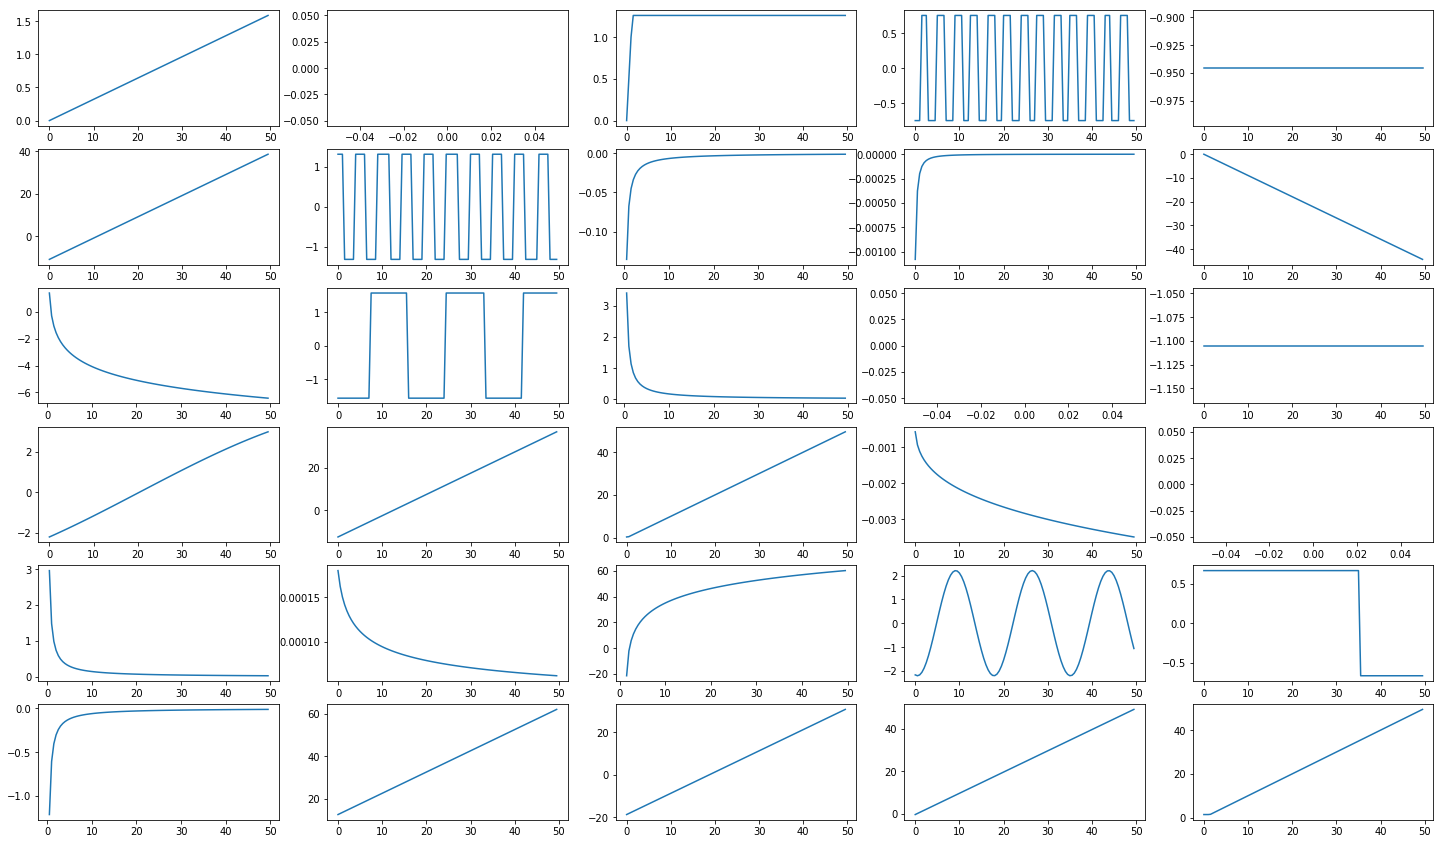

In [39]:
fig = plt.figure(figsize=(25,20))
base_sample = [get_random_fn()(x) for i in range(30)]
for i,y in enumerate(base_sample):
    ax = plt.subplot(8, 5, i + 1)
    ax.plot(x, y)

In [7]:
def get_random_higher_order_fn():
    fns = [
        lambda a,b: lambda x: a(x) + b(x),
        lambda a,b: lambda x: a(x) - b(x),
        lambda a,b: lambda x: a(x) * b(x),
        lambda a,b: lambda x: a(x) / b(x),
        lambda a,b: lambda x: a(b(x)),
        lambda a,b: lambda x: b(a(x))
    ]
    return fns[np.random.randint(len(fns))]

In [9]:
def get_random_y(x, complexity=3):
    fn = reduce(lambda fn, i: get_random_higher_order_fn()(fn, get_random_fn()), range(complexity), get_random_fn())
    return fn(x)

/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':
/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sin
  import sys
/Users/caloaner/anaconda3/lib/python3.6/site-packages/scipy/signal/waveforms.py:150: RuntimeWarning: invalid value encountered in greater
  mask1 = (w > 1) | (w < 0)
/Users/caloaner/anaconda3/lib/python3.6/site-packages/scipy/signal/waveforms.py:150: RuntimeWarning: invalid value encountered in less
  mask1 = (w > 1) | (w < 0)
/Users/caloaner/anaconda3/lib/python3.6/site-packages/scipy/signal/waveforms.py:155: RuntimeWarning: invalid value encountered in less
  mask2 = (1 - mask1) & (tmod < w * 2 * pi)
/Users/caloaner/anaconda3/lib/python3.6/site-packages/ip

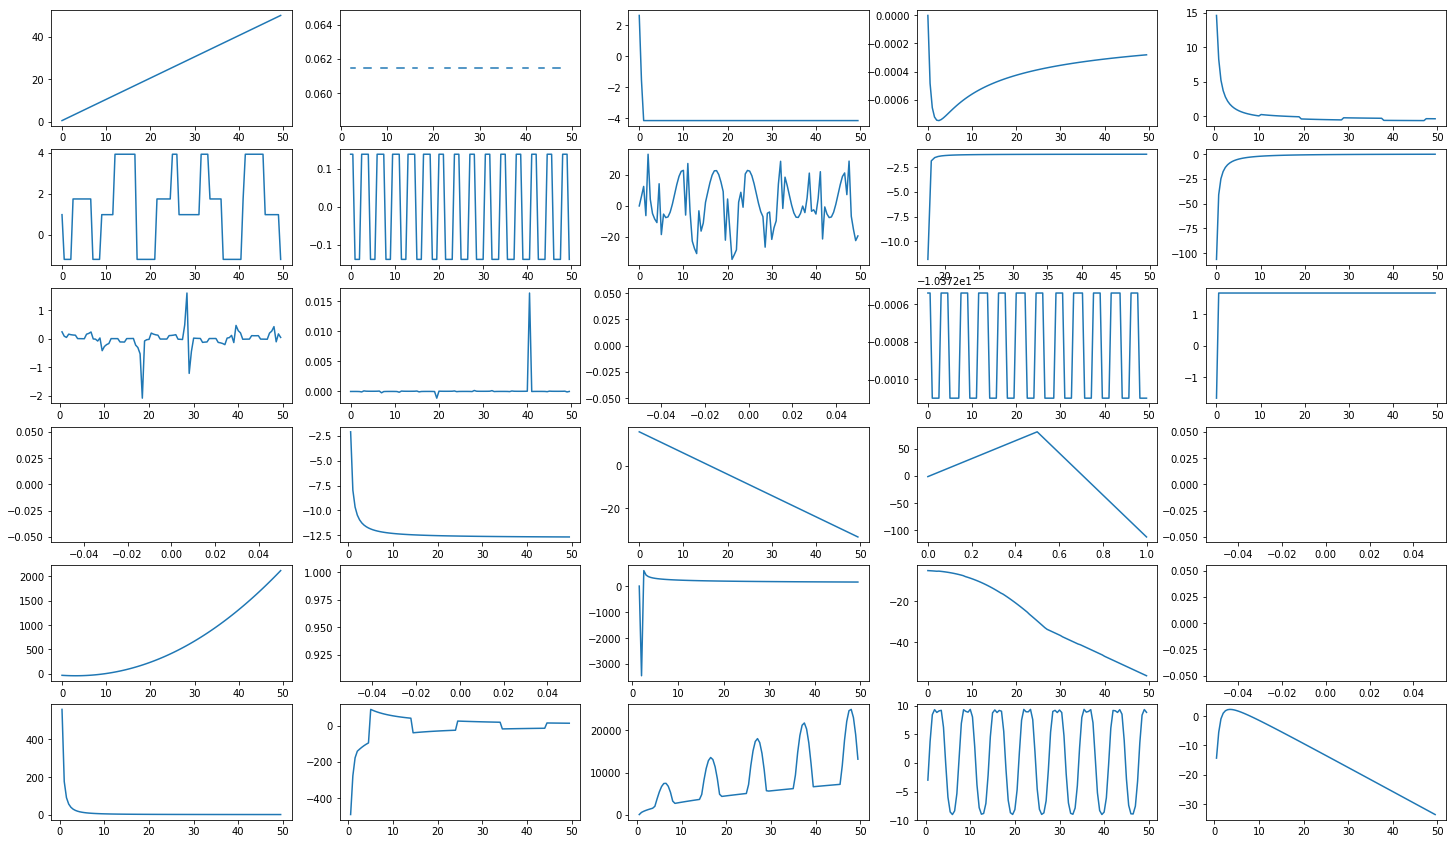

In [40]:
fig = plt.figure(figsize=(25,20))
for i in range(30):
    ax = plt.subplot(8, 5, i + 1)
    ax.plot(x, get_random_y(x, complexity=3))

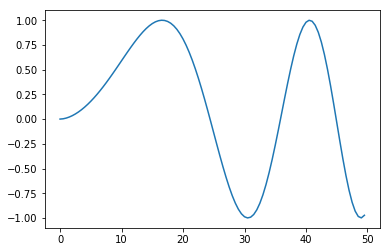

In [19]:
plt.plot(x, np.sin(0.01*x**1.8))

In [15]:
x

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

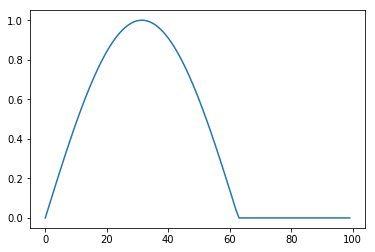

In [41]:
plt.plot(np.maximum(np.sin(x*0.1), 0))

In [196]:
np.log(0)

/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

### Generating a fixed number of points

In [66]:
x = np.arange(0, 50, 1)
data = np.array([get_random_y(x) for i in range(10000)])

/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':
/Users/caloaner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/caloaner/anaconda3/lib/python3.6/site-packages/scipy/signal/waveforms.py:150: RuntimeWarning: invalid value encountered in greater
  mask1 = (w > 1) | (w < 0)
/Users/caloaner/anaconda3/lib/python3.6/site-packages/scipy/signal/waveforms.py:150: RuntimeWarning: invalid value encountered in less
  mask1 = (w > 1) | (w < 0)
/Users/caloaner/anaconda3/lib/python3.6/site-packages/scipy/signal/waveforms.py:155: RuntimeWarning: invalid value encountered in less
  mask2 = (1 - mask1) & (tmod < w * 2 * pi)
/Users/caloaner/anaconda3/lib/python3.6/site-packa

In [67]:
len(data)

10000

In [68]:
train_test_ratio = 0.8
train_size = int(np.floor(len(data) * train_test_ratio))
train = data[:train_size]
test = data[train_size:]

In [69]:
len(train), len(test)

(8000, 2000)

In [78]:
def x_y_split_on_last_point(data):
    return data[:,:-1], data[:,-1]

In [75]:
test[:2]

array([[-1.45585072,  3.98988182,  2.41910846, -1.93454025, -2.23343118,
         0.79187213,  5.11020673, -1.16400265,  3.62357107, 11.46565159,
        12.56010631,  7.63873942, -1.07661516,  2.8110528 ,  3.35940658,
        -1.64181086, -2.31626357, -0.01660821,  5.16271683, -0.55489508,
         2.14009884, 10.78013199, 12.72011005,  8.8679411 , -0.30554881,
         1.35357614,  4.19821197, -1.23372483, -2.35400671, -0.695185  ,
         4.83141707,  0.22950211,  0.7948028 ,  9.91552295, 12.77223706,
         9.91802221,  0.79804366,  0.22735515,  4.83271848, -0.69359392,
        -2.35395898, -1.23495674,  4.19624228,  1.35762874, -0.30802917,
         8.86495803, 12.71983563, 10.78214994,  2.14383869, -0.5567762 ],
       [        inf,  3.74488772,  2.80306692,  2.48912665,  2.33215652,
         2.23797444,  2.17518638,  2.13033777,  2.09670131,  2.07053963,
         2.04961027,  2.03248626,  2.01821625,  2.00614162,  1.99579194,
         1.98682222,  1.97897371,  1.97204856,  1.

In [81]:
x_test, y_test = x_y_split_on_last_point(test)
x_train, y_train = x_y_split_on_last_point(train)

## Model Training

Let's start with some basic scikit learn functions as a baseline

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
m = RandomForestRegressor()
m.fit(x_train, y_train)
m.score()

/Users/caloaner/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').